In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\user\Desktop\internship\data\dataset1-master\census_income.csv')
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.shape   # shape of data

(32560, 15)

In [5]:
df.drop_duplicates(inplace=True)   # dropping duplicates if any

In [6]:
df.shape # shape after dropping duplicates

(32536, 15)

In [7]:
df.isnull().sum().sum() # checking is there any nulll values or not

0

Procceed forward as there is no null values in data

In [8]:
df.info()   # checking the info of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [9]:
object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    df[column] = df[column].astype('category')   # we Set all categorical columns to type category.

In [10]:
df.info()  # checking the data again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32536 non-null  int64   
 1   Workclass       32536 non-null  category
 2   Fnlwgt          32536 non-null  int64   
 3   Education       32536 non-null  category
 4   Education_num   32536 non-null  int64   
 5   Marital_status  32536 non-null  category
 6   Occupation      32536 non-null  category
 7   Relationship    32536 non-null  category
 8   Race            32536 non-null  category
 9   Sex             32536 non-null  category
 10  Capital_gain    32536 non-null  int64   
 11  Capital_loss    32536 non-null  int64   
 12  Hours_per_week  32536 non-null  int64   
 13  Native_country  32536 non-null  category
 14  Income          32536 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.0 MB


In [11]:
df.describe().T    # data Statistics

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [12]:
df['Income'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32536, dtype: category
Categories (2, object): [' <=50K', ' >50K']>

In [13]:
df['Sex'].unique

<bound method Series.unique of 0           Male
1           Male
2           Male
3         Female
4         Female
          ...   
32555     Female
32556       Male
32557     Female
32558       Male
32559     Female
Name: Sex, Length: 32536, dtype: category
Categories (2, object): [' Female', ' Male']>

In [14]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


In [15]:
df.skew().sort_values()

Education_num     -0.309454
Hours_per_week     0.228752
Age                0.557657
Fnlwgt             1.447695
Capital_loss       4.592622
Capital_gain      11.949245
dtype: float64

#### performing EDA

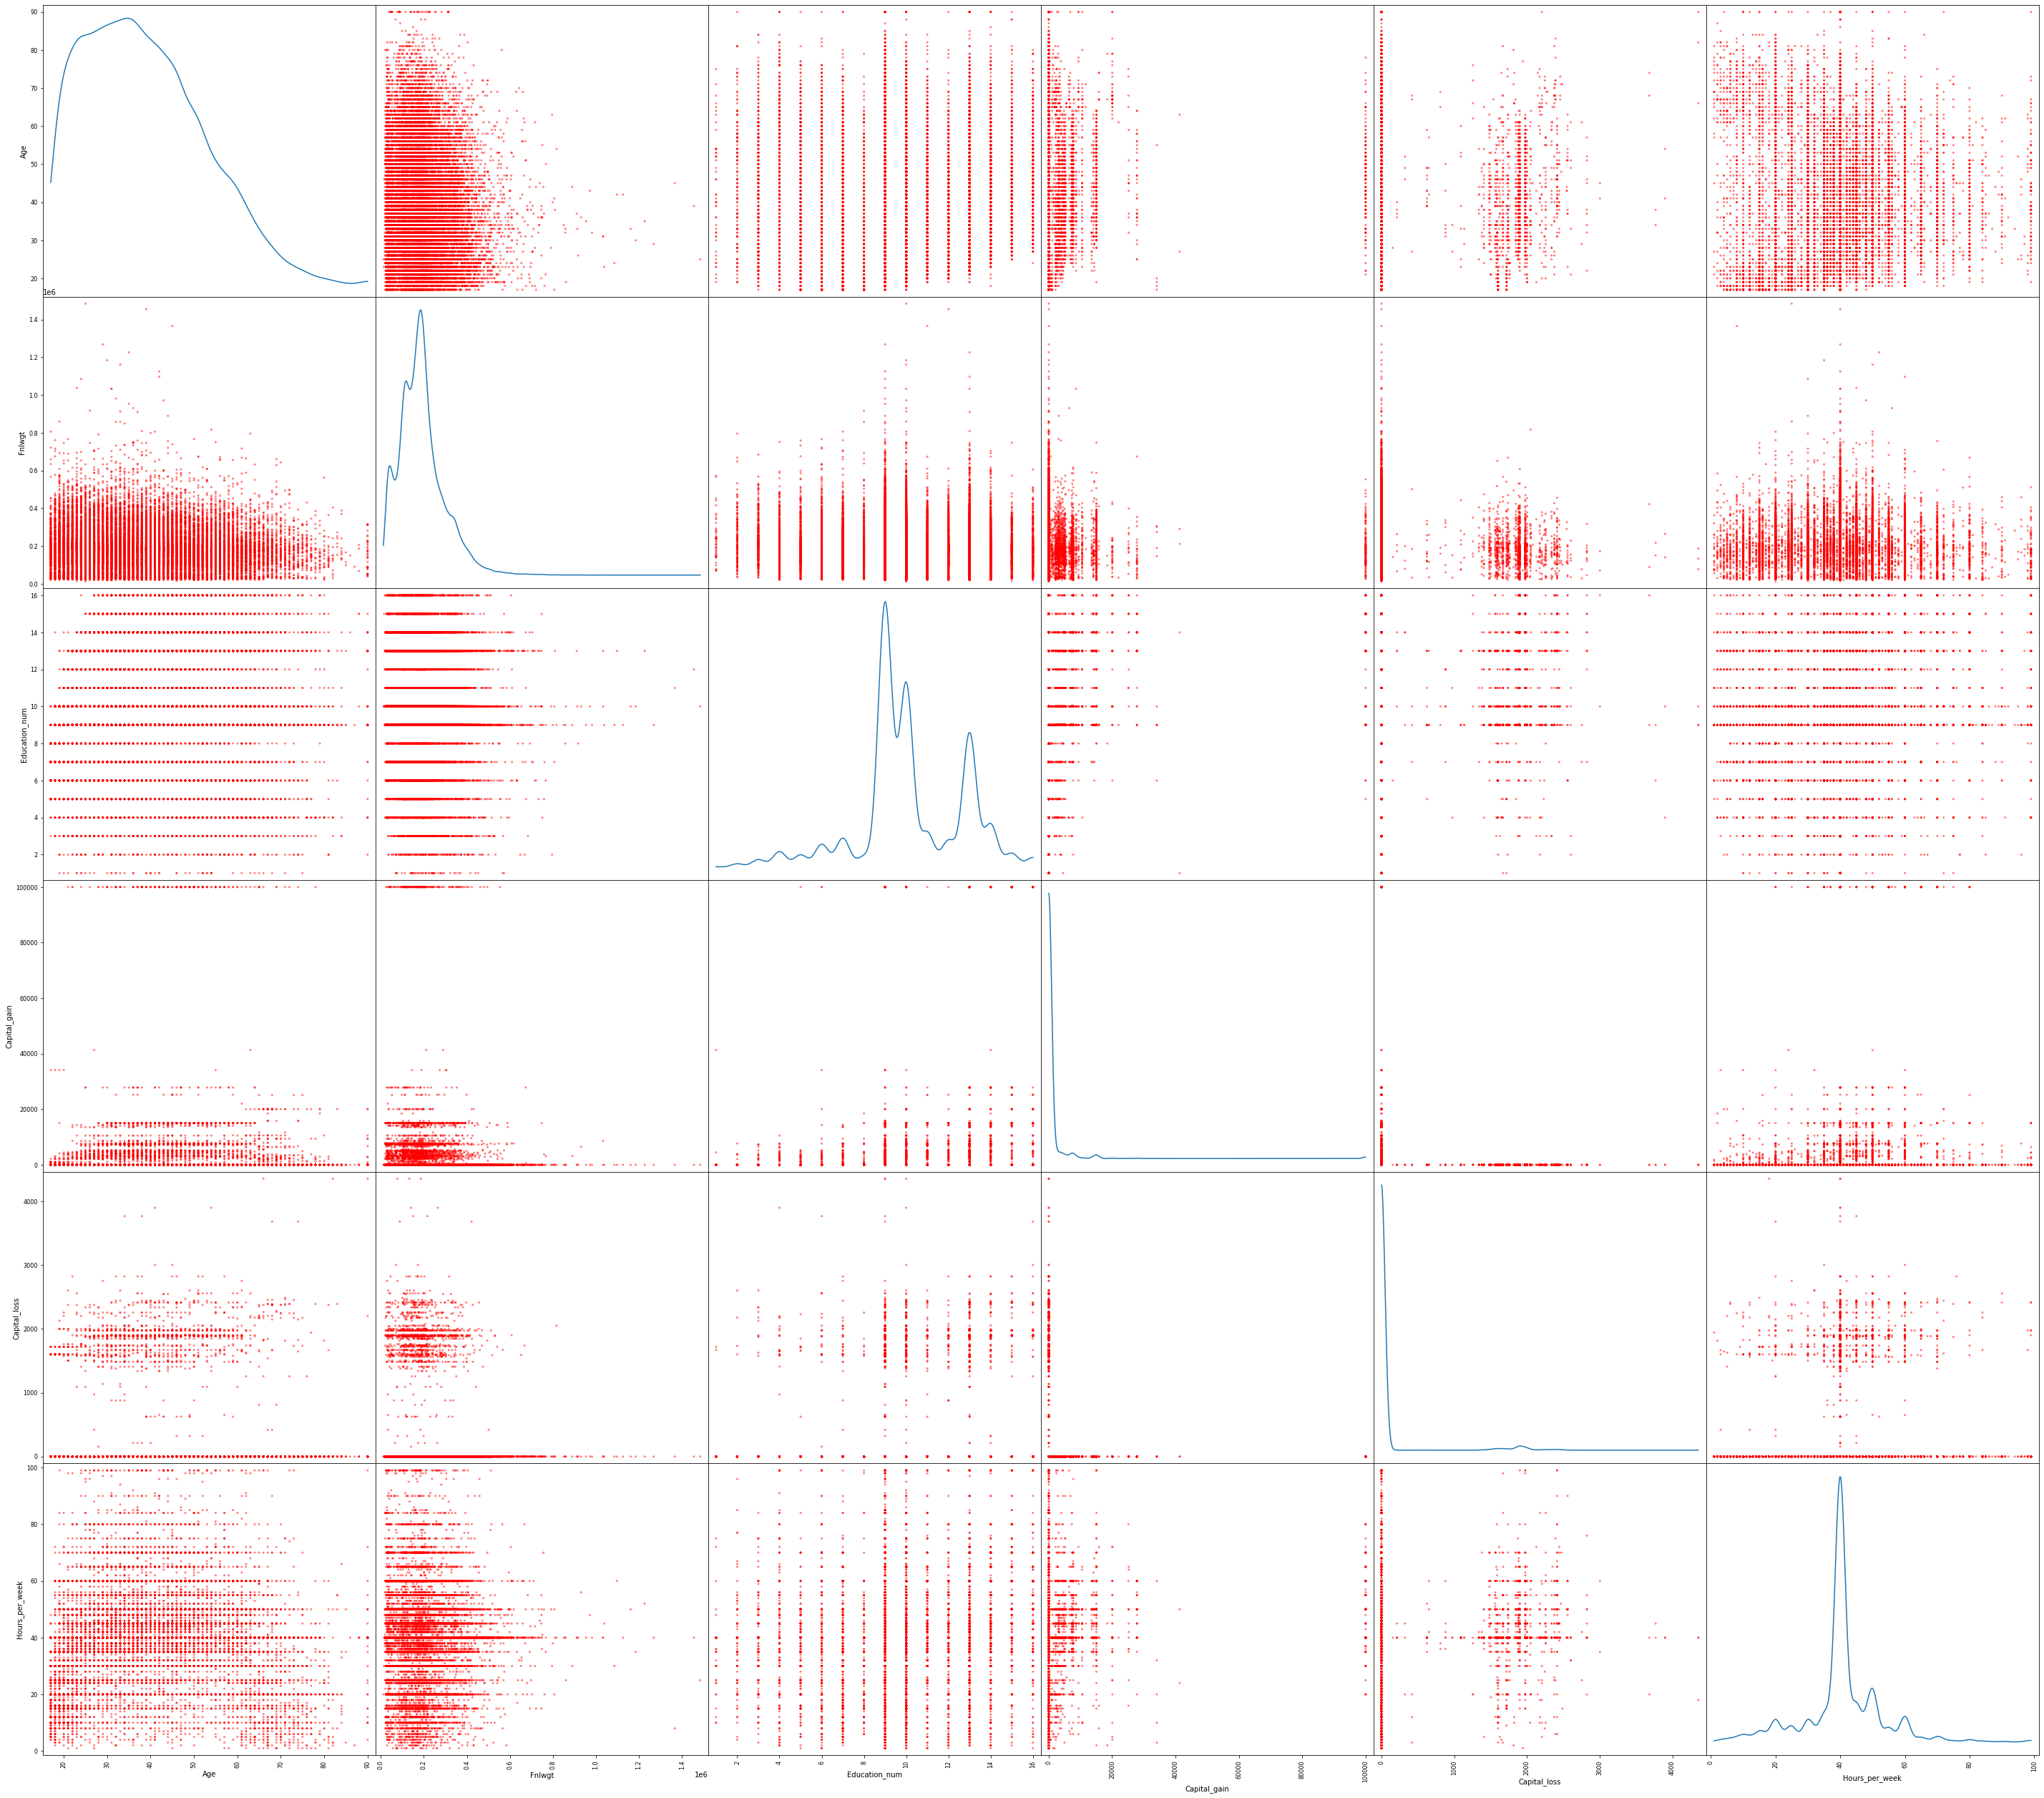

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(50,45),color='r',diagonal='kde')
plt.show()

### Education Vs Income

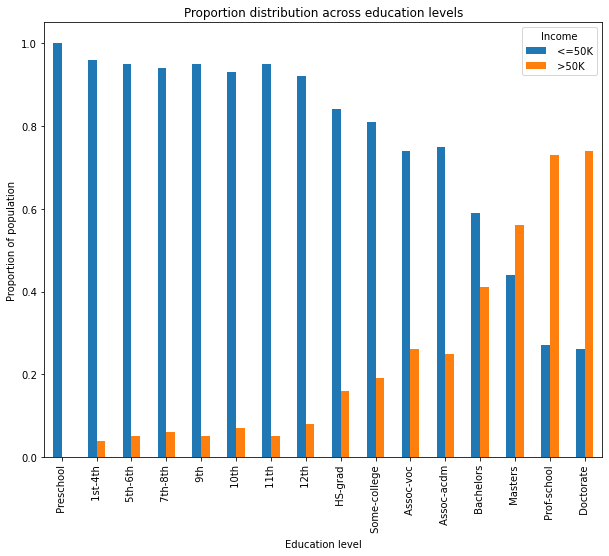

In [17]:
# Assuming 'df' is your DataFrame containing the 'Education' and 'Income' columns
edu_level = {}
for x, y in zip(df['Education_num'], df['Education']):
    edu_level[y] = x

education = round(pd.crosstab(df['Education'], df['Income']).div(pd.crosstab(df['Education'], df['Income']).apply(sum, 1), 0), 2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind='bar', title='Proportion distribution across education levels', figsize=(10, 8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

plt.show()

### Gender vs Income

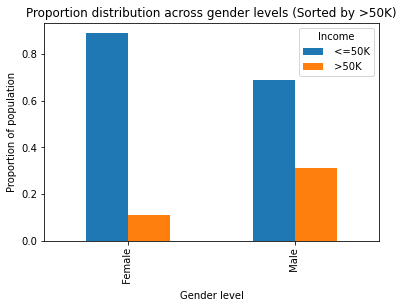

In [18]:
# containing the 'Sex' and 'income' columns
# Create a DataFrame containing the proportion distribution of income across gender levels
Income = round(pd.crosstab(df.Sex, df.Income).div(pd.crosstab(df.Sex, df.Income).apply(sum,1),0), 2)

# Sort the DataFrame by the column '>50K'
sorted_income = Income.sort_values(by=' >50K')

# Plot the bar graph
ax = sorted_income.plot(kind='bar', title='Proportion distribution across gender levels (Sorted by >50K)')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

plt.show()


In the figure below, we plot a bar graph showing the proportion of income classes across the genders. From the graph, in an overall view, there exists a wage gap between females and males. Since we do not have the exact value of the income, we are limited to only observing that the proportion of males earning more than $50,000 a year is more than double that of their female counterparts.

#### Workclas Vs Income

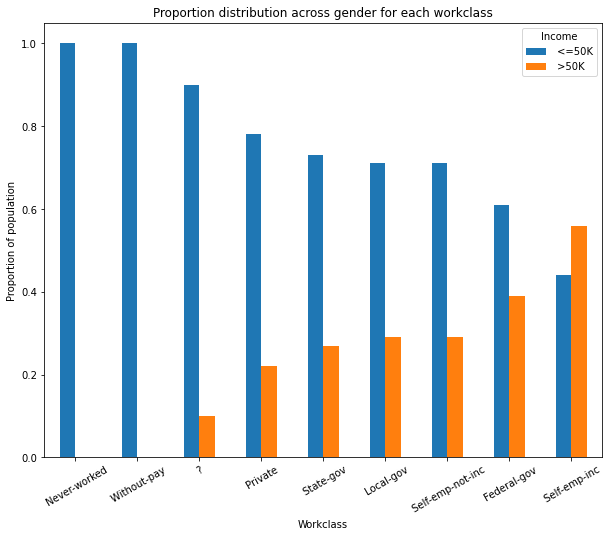

In [19]:
workclass = round(pd.crosstab(df.Workclass,df.Income).div(pd.crosstab(df.Workclass,df.Income).apply(sum, 1), 0), 2)

ax = workclass.sort_values(by=' >50K').plot(kind='bar', title='Proportion distribution across gender for each workclass', figsize=(10, 8), rot=30)

ax.set_xlabel('Workclass')
ax.set_ylabel('Proportion of population')

plt.show()

As we saw in the graph, the income of people working in private,state,local, federal,self-emp-not-inc and 
self-emp-inc is higher than that of other workclass people.

#### Occupation Vs Income

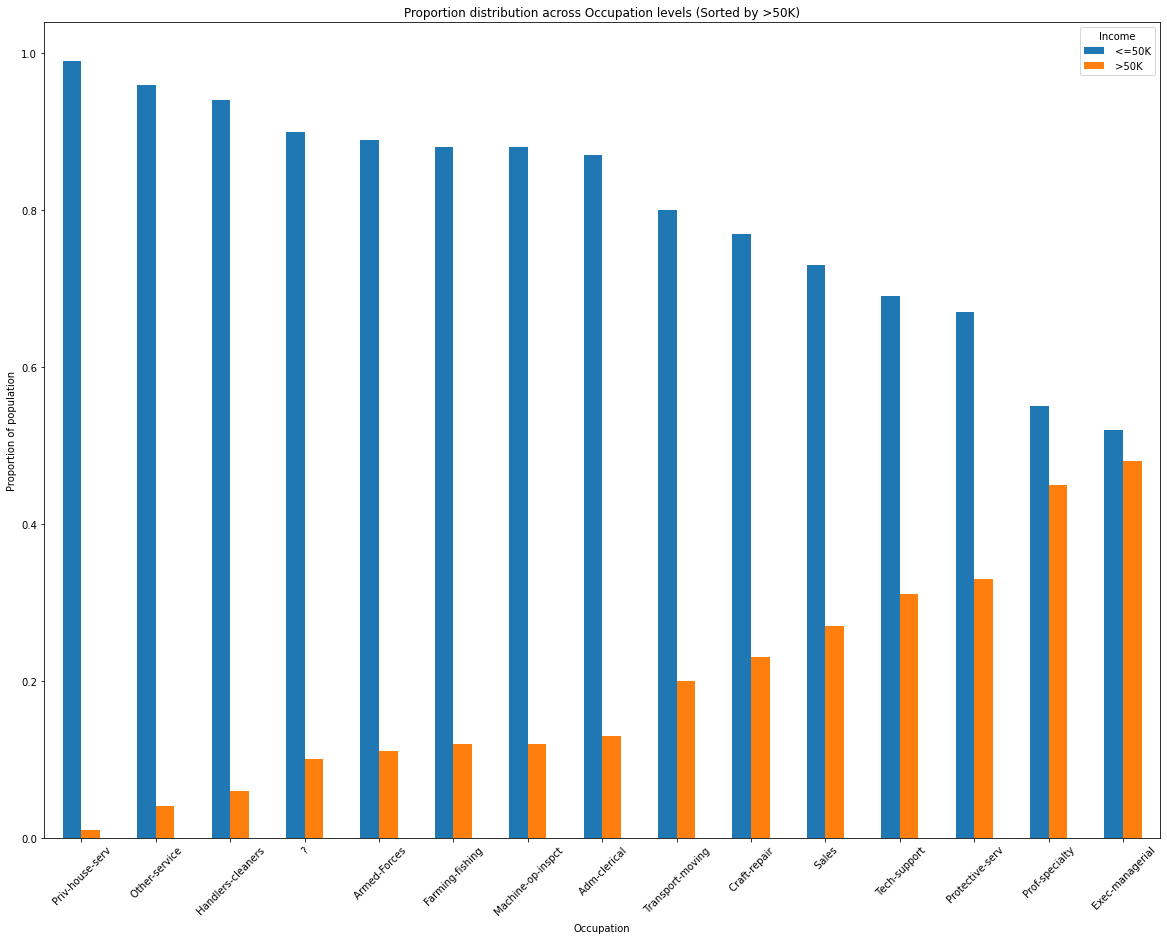

In [20]:
Occupation = round(pd.crosstab(df.Occupation, df.Income).div(pd.crosstab(df.Occupation, df.Income).apply(sum,1),0), 2)
sort_occ = Occupation.sort_values(by=' >50K')

# Plot the bar graph
ax = sort_occ.plot(kind='bar', title='Proportion distribution across Occupation levels (Sorted by >50K)', figsize=(20,15), rot=45)
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion of population')

plt.show()

#### Race Vs Income

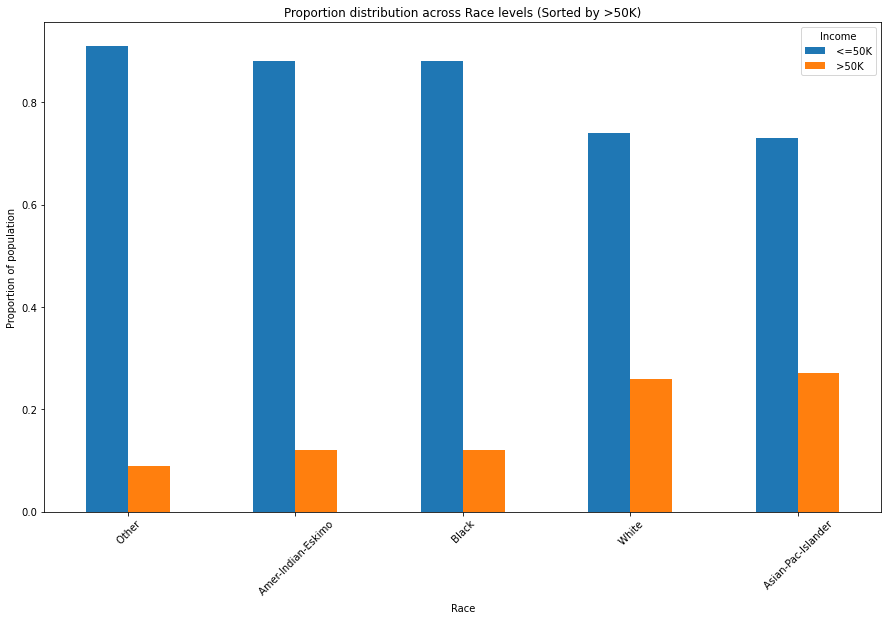

In [21]:
race = round(pd.crosstab(df.Race, df.Income).div(pd.crosstab(df.Race, df.Income).apply(sum,1),0), 2)
sort_race = race.sort_values(by=' >50K')

# Plot the bar graph
ax = sort_race.plot(kind='bar', title='Proportion distribution across Race levels (Sorted by >50K)', figsize=(15,9), rot=45)
ax.set_xlabel('Race')
ax.set_ylabel('Proportion of population')

plt.show()

#### Native Country Vs Income

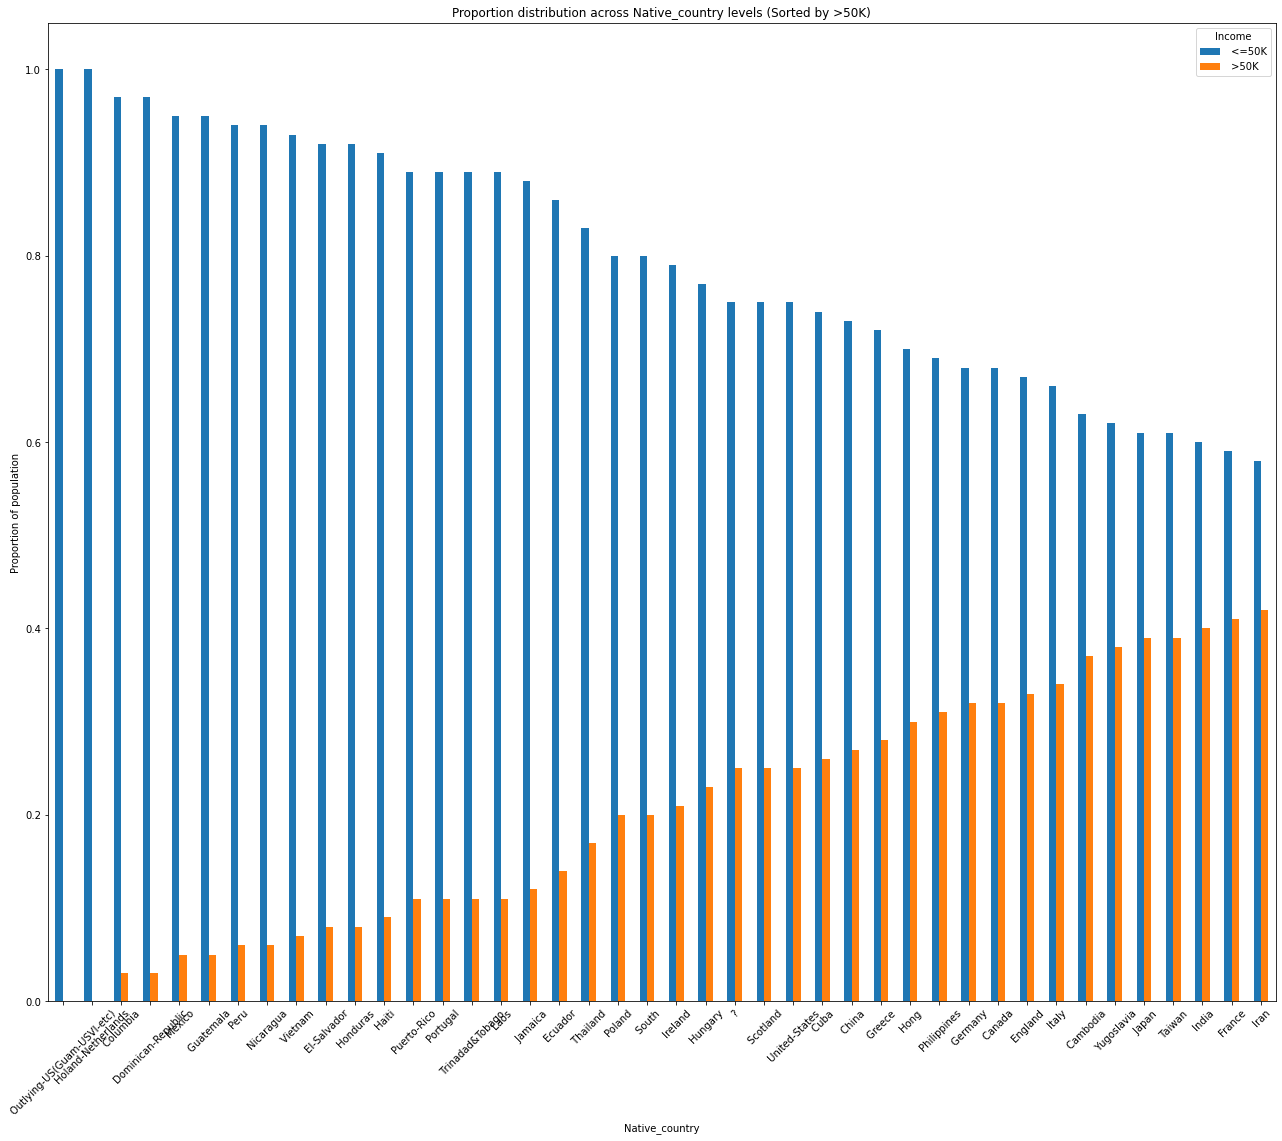

In [22]:
Native_country = round(pd.crosstab(df.Native_country, df.Income).div(pd.crosstab(df.Native_country, df.Income).apply(sum,1),0), 2)
sort_count = Native_country.sort_values(by=' >50K')

# Plot the bar graph
ax = sort_count.plot(kind='bar', title='Proportion distribution across Native_country levels (Sorted by >50K)', figsize=(22,18), rot=45)
ax.set_xlabel('Native_country')
ax.set_ylabel('Proportion of population')

plt.show()

I plotted a bar graph showing the proportion of income classes across the native country in the figure above. From the graph, we notice a trend in the positioning of the country. South American countries are at the left end of the plot, with a low proportion of populations that make more than 50,000 a year. The United States is located somewhat centrally, and at the right are countries from Europe and Asia with a higher proportion of populations that make more than 50,000 a year.

#### Hours per week per Vs Income 

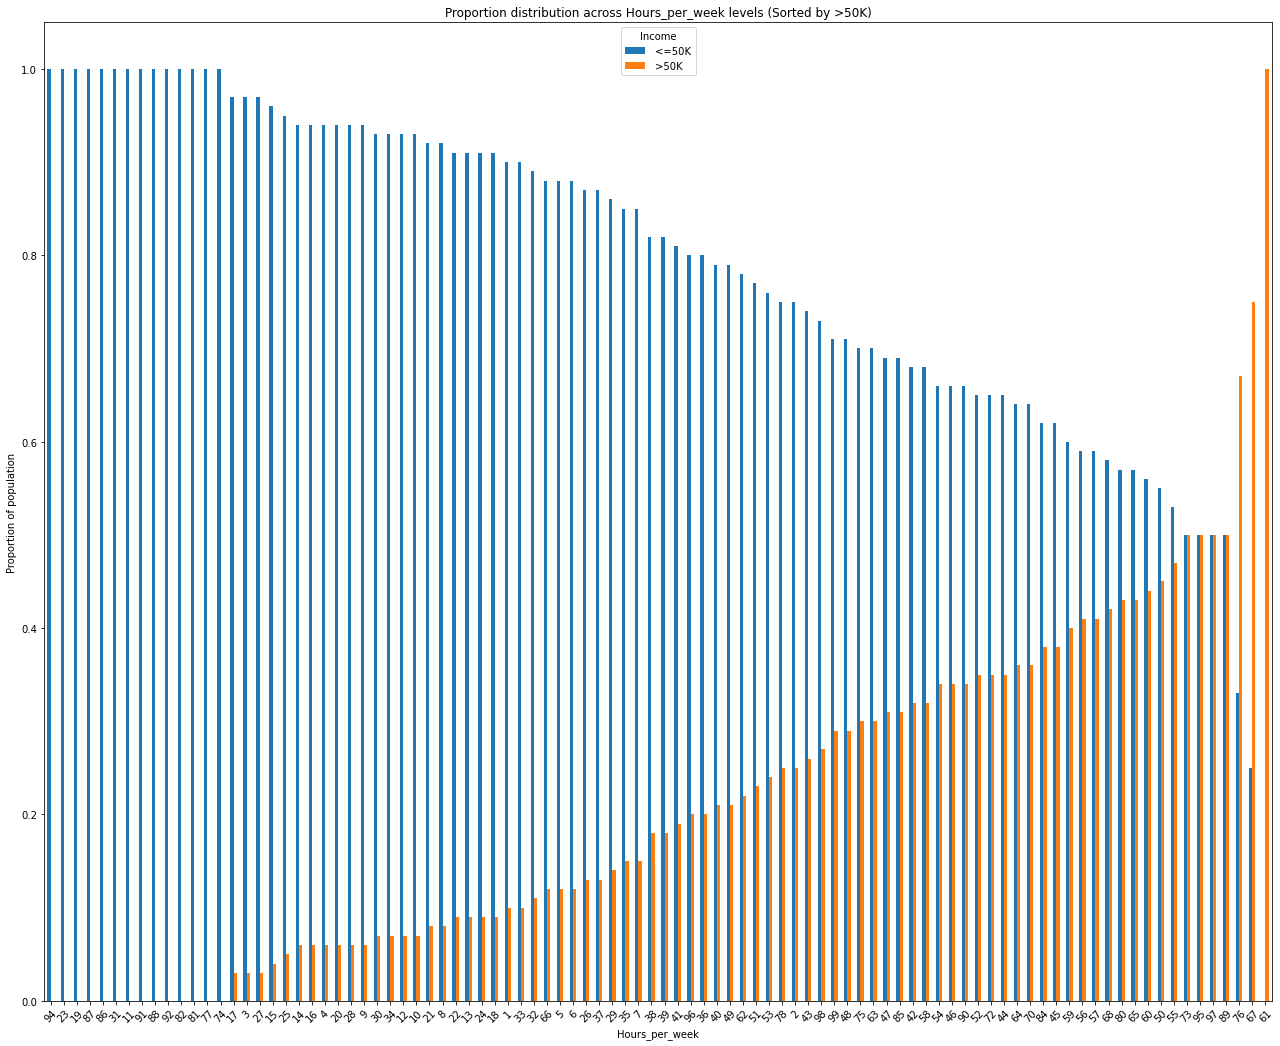

In [23]:
Hours_per_week = round(pd.crosstab(df.Hours_per_week, df.Income).div(pd.crosstab(df.Hours_per_week, df.Income).apply(sum,1),0), 2)
sort_hours = Hours_per_week.sort_values(by=' >50K')

# Plot the bar graph
ax = sort_hours.plot(kind='bar', title='Proportion distribution across Hours_per_week levels (Sorted by >50K)', figsize=(22,18), rot=45)
ax.set_xlabel('Hours_per_week')
ax.set_ylabel('Proportion of population')

plt.show()

In above a bar graph to display the distribution of income classes according to the number of hours worked. We would anticipate observing a trend: the percentage of the population earning more than 50,000 annually increases with the number of hours worked each week. On the basis of the graph, this wasn't always the case. No one made more than 50,000 a year for several hours worked (for instance, 77, 79, 81, 82, 87, 88, and so on).

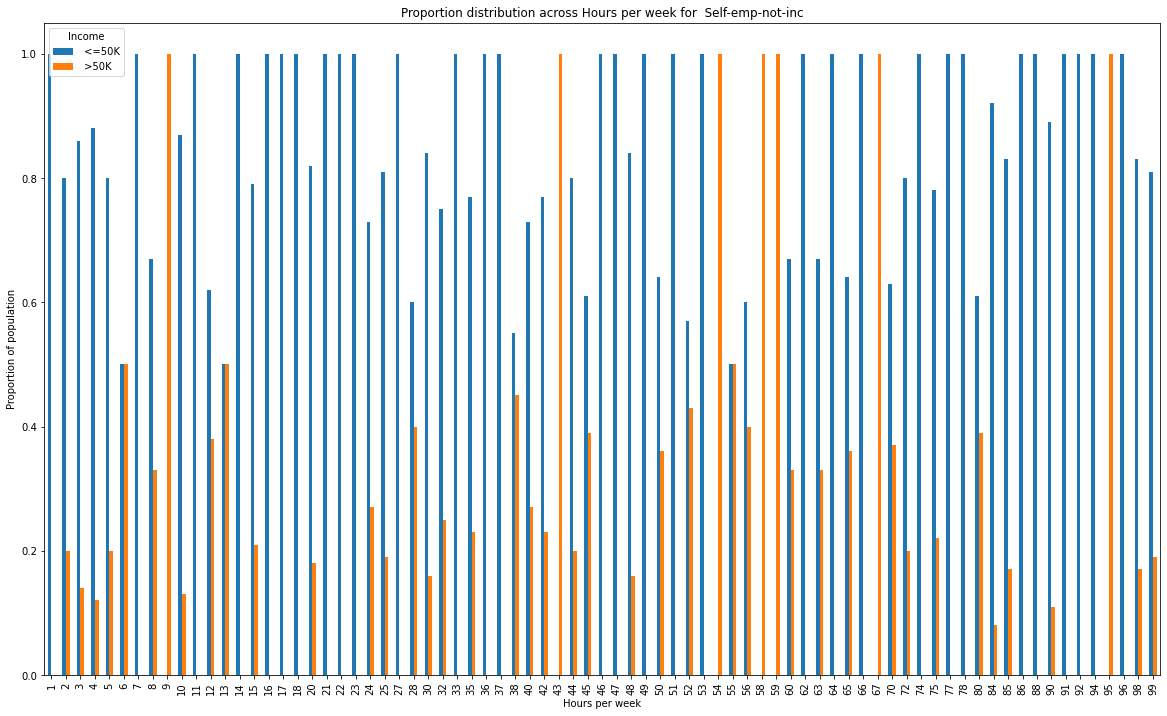

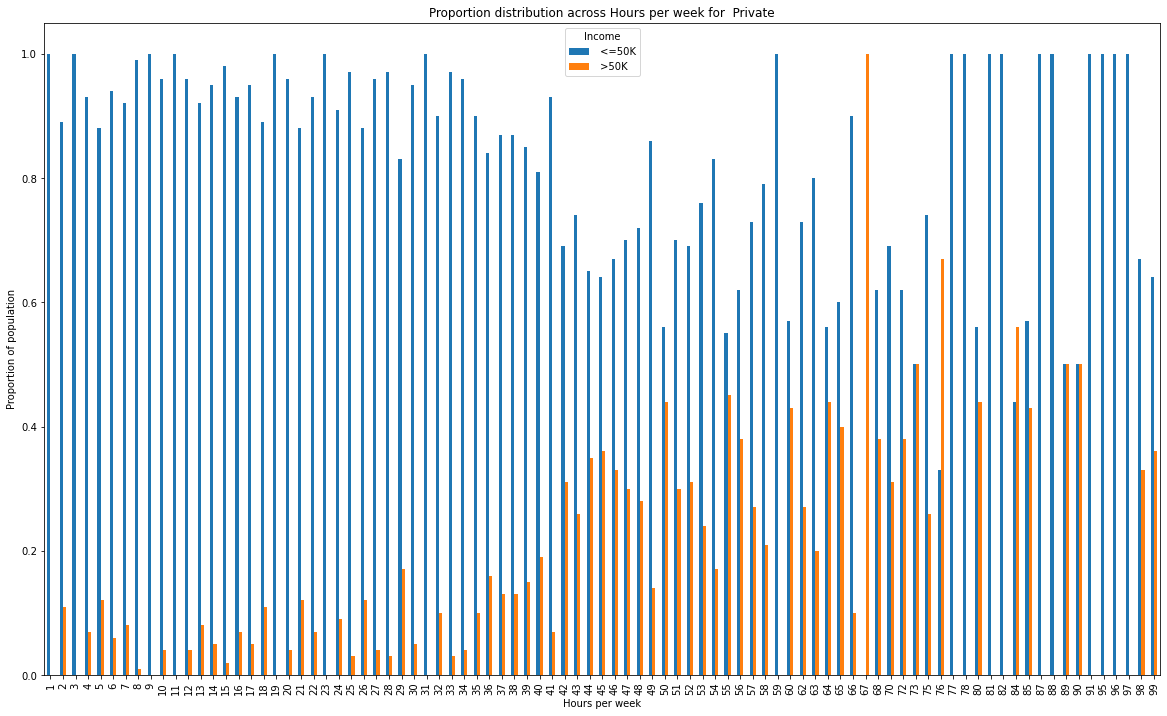

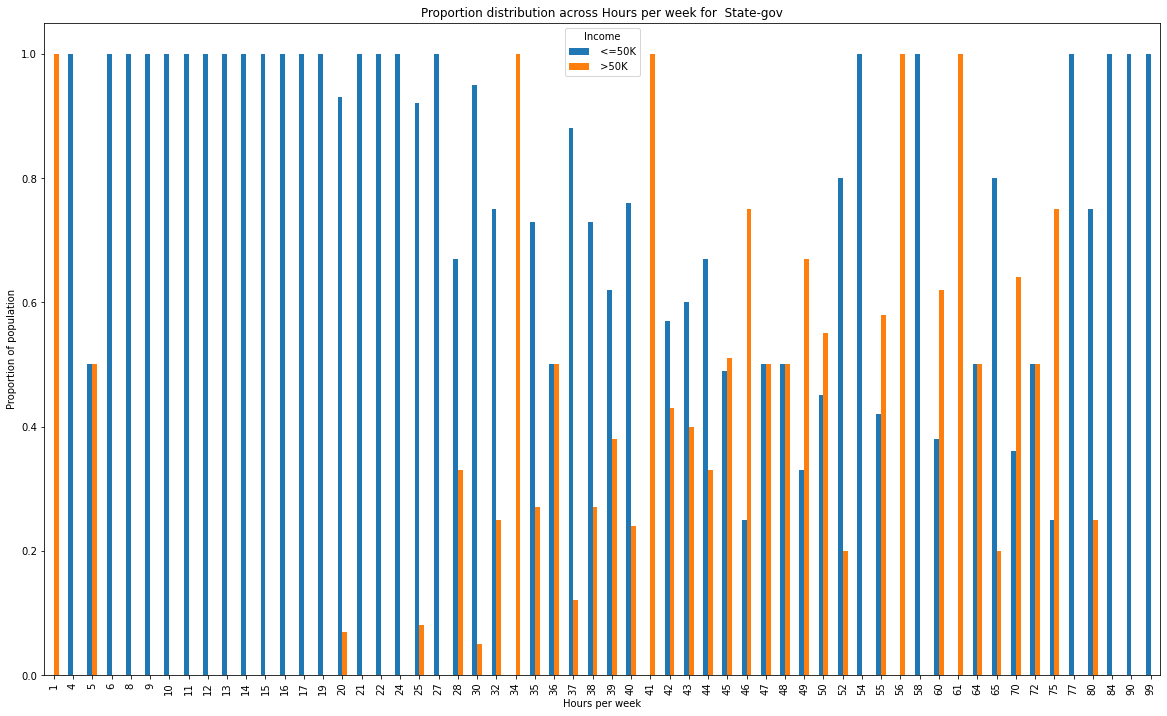

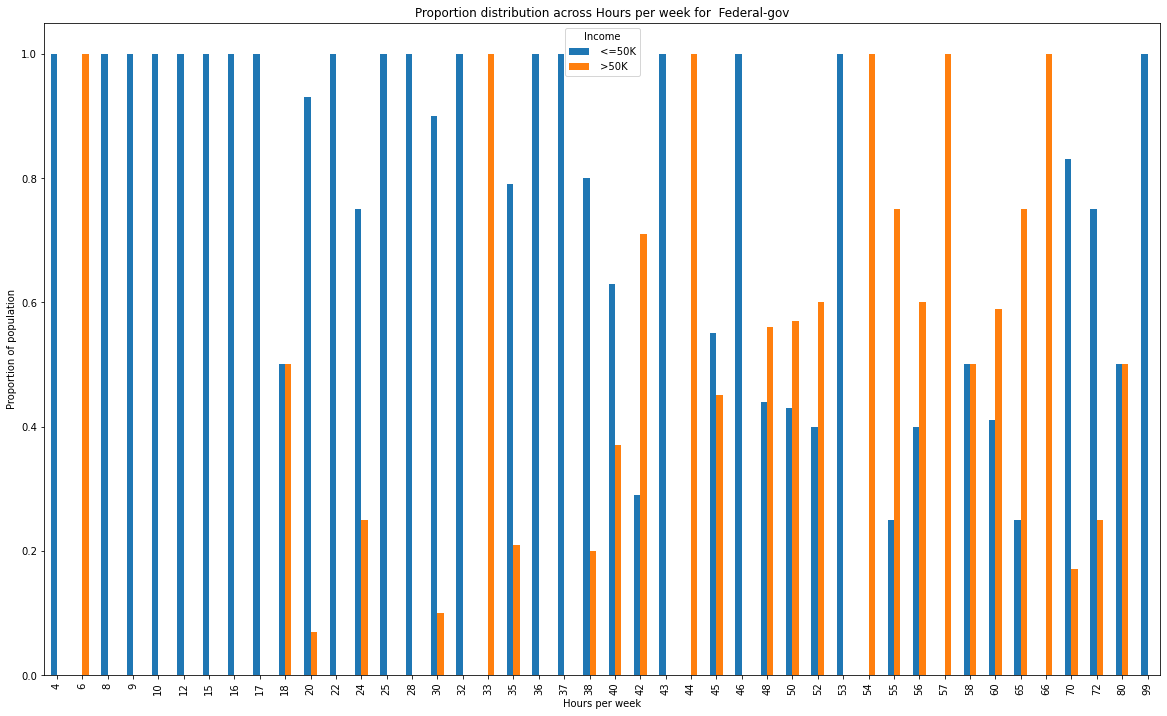

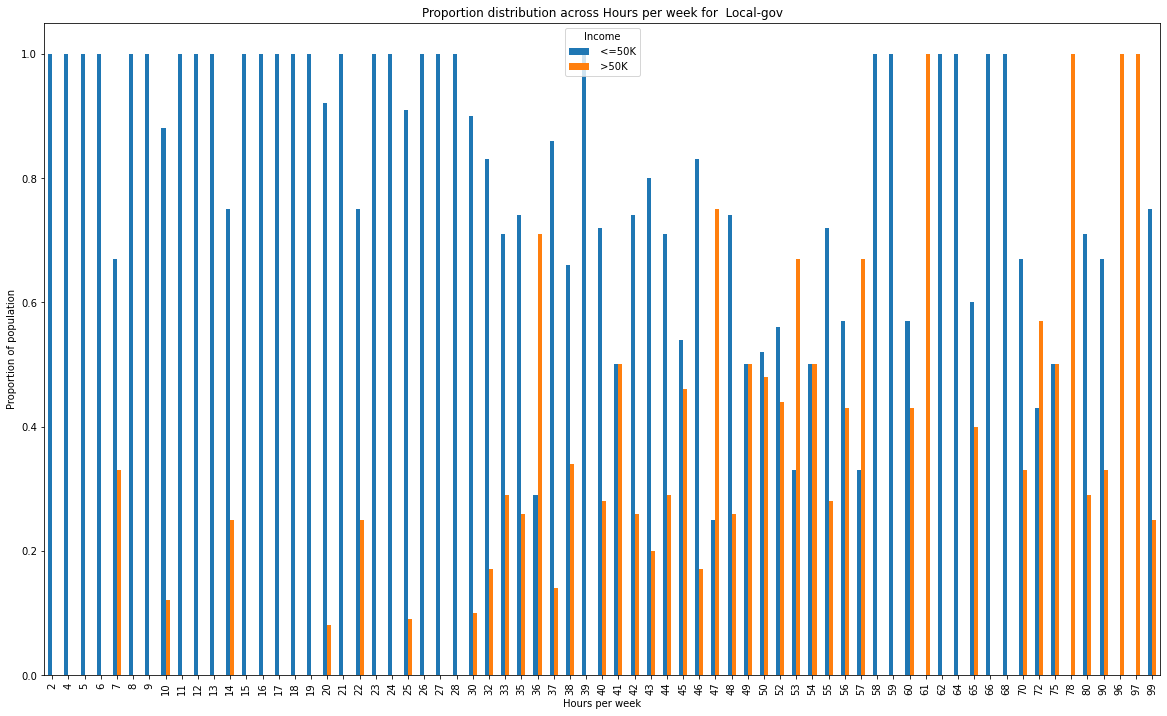

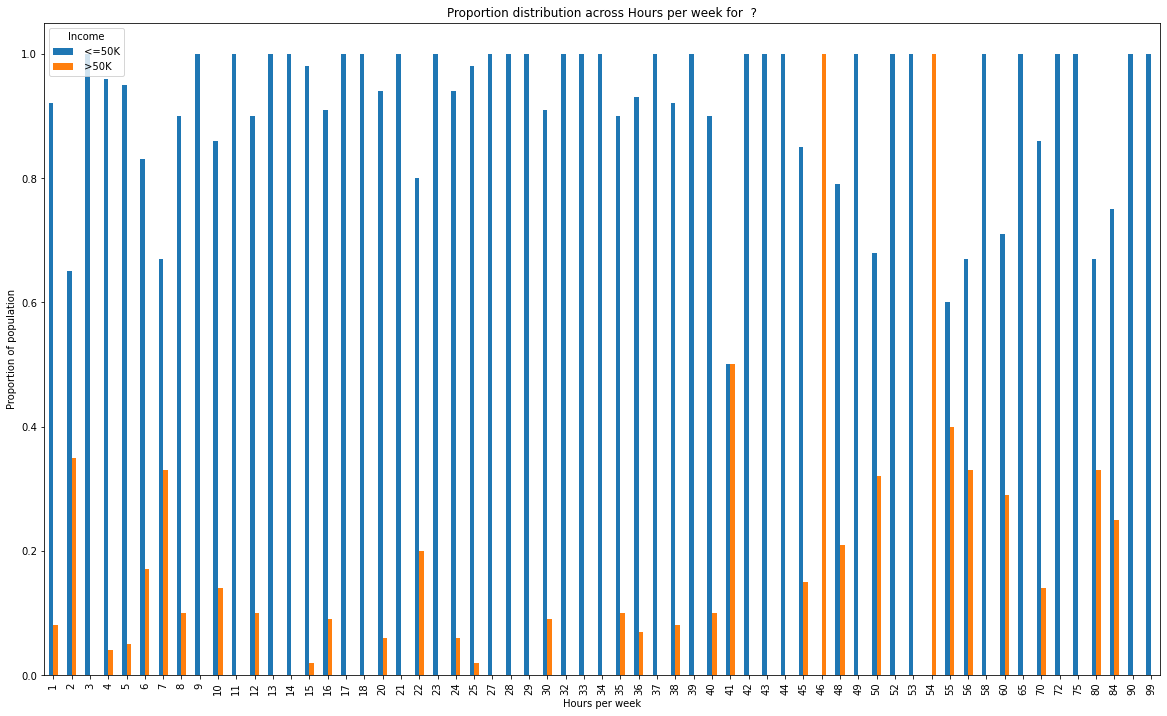

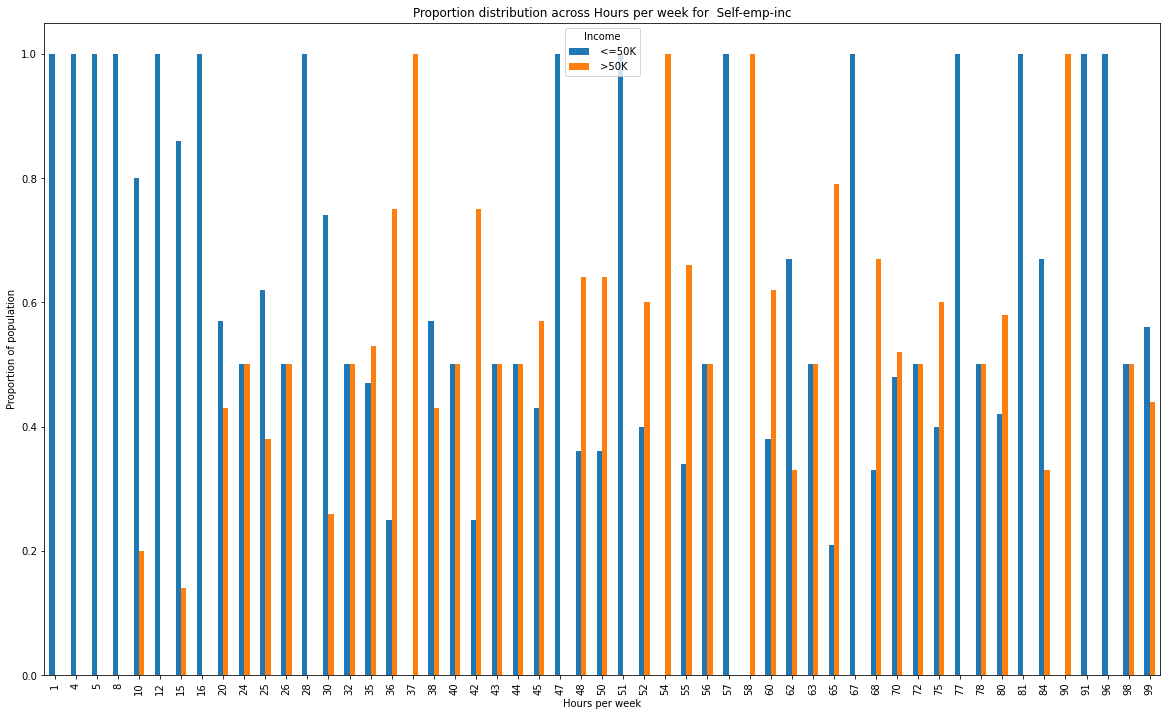

KeyError: ' >50K'

In [24]:
for i in df.Workclass.unique():
    dfz = df[df.Workclass == i]

    hours_per_week = round(pd.crosstab(dfz['Hours_per_week'], dfz.Income).div(pd.crosstab(dfz['Hours_per_week'], dfz.Income).apply(sum,1),0),2)
    hours_per_week.sort_values(by = ' >50K')
    ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week for '+ i, figsize = (20,12))
    ax.set_xlabel('Hours per week')
    ax.set_ylabel('Proportion of population')
    plt.show()
    print()

<AxesSubplot:>

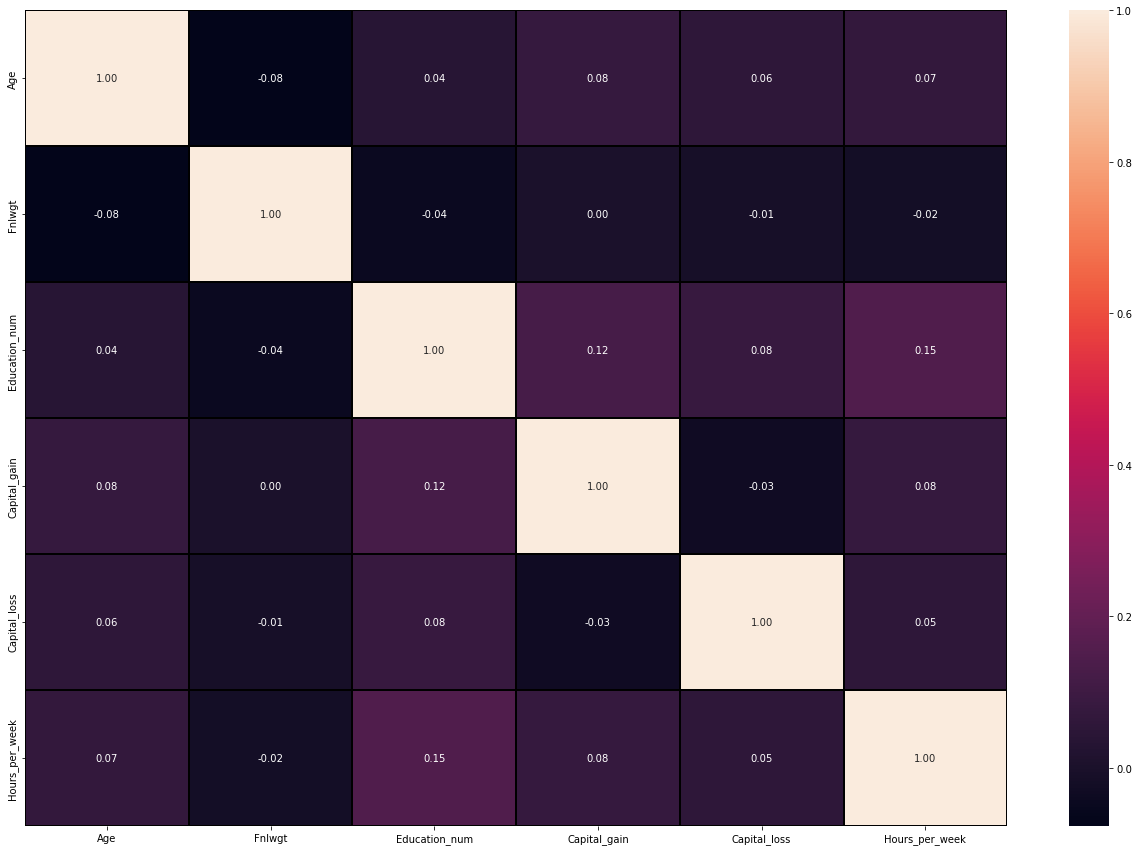

In [25]:
# plotting heat map
plt.figure(figsize=(22,15)) # ploting the heat map
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

We will now remove a few columns that will corrupt our data in next columns. We will remove the columns for education, hours_per_week, and Fnlwgt. They should be dropped for the following reasons: 'Education' and 'educational number' are two features that describe education level and have the same meaning. I will not use the categorical education attribute in order to prevent overstating the impact of this characteristic on the models. I exclude the "hours per week" field and use the category hours of labour column instead. Additionally, I decided not to use the "Fnlwgt" feature, which the census uses to modify the sample fraction for non-response and over- or undersampling of specific groups. This characteristic does not.

In [26]:
df=df.drop(columns=['Education','Hours_per_week','Fnlwgt'],inplace=True)

#### splitting data into features and labels

In [28]:
# now we willseprate features and labels
features=['Age', 'Workclass','Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Capital_gain', 'Capital_loss', 'Native_country']
label=['Income']
X=features
y=label

In [34]:
# importing some important kibraries
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [35]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [36]:
# define dataset
X, y = make_classification(n_samples=213, weights=[0.193], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 171, 0: 42})
Counter({0: 171, 1: 171})


### Applying ML

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30,stratify=y)

In [38]:
# For LOgestic regression
lr= LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 94.44444444444444
Training Accuracy 99.37106918238993
[[ 9  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.95      0.98      0.97        43

    accuracy                           0.94        54
   macro avg       0.93      0.90      0.91        54
weighted avg       0.94      0.94      0.94        54



In [39]:
# For KNN
KNN= KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_KNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

Test Accuracy 90.74074074074075
Training Accuracy 96.22641509433963
[[ 8  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.93      0.95      0.94        43

    accuracy                           0.91        54
   macro avg       0.87      0.84      0.85        54
weighted avg       0.90      0.91      0.91        54



In [40]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 90.74074074074075
Training Accuracy 100.0
[[ 9  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.95      0.93      0.94        43

    accuracy                           0.91        54
   macro avg       0.85      0.87      0.86        54
weighted avg       0.91      0.91      0.91        54



In [41]:
# For Random Forest Classifier
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_rdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 90.74074074074075
Training Accuracy 100.0
[[ 9  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.95      0.93      0.94        43

    accuracy                           0.91        54
   macro avg       0.85      0.87      0.86        54
weighted avg       0.91      0.91      0.91        54



In [42]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,pred_svc)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Test Accuracy 94.44444444444444
Training Accuracy 99.37106918238993
[[ 9  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.95      0.98      0.97        43

    accuracy                           0.94        54
   macro avg       0.93      0.90      0.91        54
weighted avg       0.94      0.94      0.94        54



#### Cross validation score

In [43]:
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 96.22369878183832


In [44]:
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

Cross Validation Score of KNN model : 92.01550387596899


In [45]:
cr_3=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DT model :",cr_3.mean()*100)

Cross Validation Score of DT model : 92.50276854928018


In [46]:
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

Cross Validation Score of RDF model : 95.29346622369879


In [47]:
cr_5=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of SVC model :",cr_5.mean()*100)

Cross Validation Score of SVC model : 96.22369878183832


As the cross-validation score and test accuracy are higher in the SVC model, we will do hyperparameter tuning with the SVC model.

## Hyperparameter Tunning 

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVC model
model = SVC()

# Define the hyperparameters grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy*100)
grid_search.best_estimator_

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.975
Accuracy: 94.44444444444444


SVC(C=10)

## Plotting Roc and auc curve

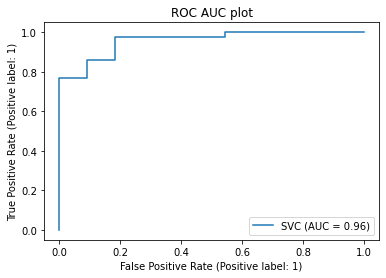

In [53]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(grid_search.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show() 

### Conclusion
I decided that the SVC model would be my favourite method. Of all the models created for this investigation, the SVC model not only has the highest accuracy, but also the highest precision and cross-validation score. Utilising SVC over other models has the benefit of being much easier to implement. They are less prone to overfitting since they are composed of weak individual learners. SVC is however vulnerable to erratic data and outliers.

##### Finish